### Задание

Создайте систему компьютерного зрения, которая будет определять тип геометрической фигуры. Используя подготовленную базу и шаблон ноутбука проведите серию экспериментов по перебору гиперпараметров нейронной сети, распознающей три категории изображений (треугольник, круг, квадрат).

1. Поменяйте количество нейронов в сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с `relu` на `linear`.
3. Поменяйте размеры batch_size:
- 10
- 100
- 1000

4. Выведите на экран получившиеся точности.

Всего должно получиться 18 комбинаций указанных параметров.

Создайте сравнительную таблицу по результатам проведенных тестов.

##Импорт библиотек

In [ ]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
# Подключение модуля для работы с файлами
import os

import gdown

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

##Загрузка файлов и создание выборок

In [ ]:
# Загрузка датасета из облака

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_light.zip', None, quiet=True)

'hw_light.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_light.zip

In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (302, 20, 20, 1)
Размер массива y_train (302,)


Вывод изображения

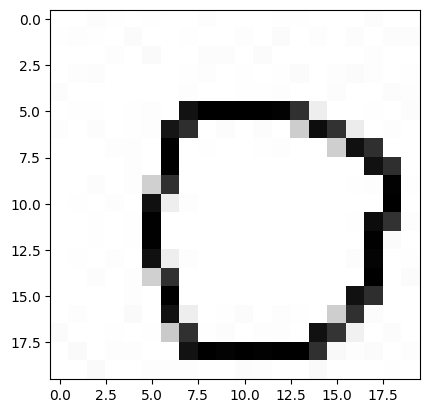

In [ ]:
# Номер картинки
n = 299

# Отрисовка картинки
plt.imshow(x_train[n], cmap='gray')

# Вывод n-й картинки
plt.show()

##Изменение формы данных в выборках

In [ ]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train_r = x_train.reshape(x_train.shape[0], -1)
# Проверка результата
print(f'Форма обучающих данных: {x_train.shape} -> {x_train_r.shape}')

Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Нормализация данных

In [ ]:
# Нормализация входных картинок
# Преобразование x_train_r в тип float32 (числа с плавающей точкой) и нормализация
x_train_r = x_train_r.astype('float32') / 255.

Задание количества классов

In [ ]:
# Задание константы количества распознаваемых классов
CLASS_COUNT = 3

Создание выборки

In [ ]:
y_train_r = utils.to_categorical(y_train, CLASS_COUNT)
# Вывод формы y_train_r
# 300 примеров, каждый длины 3 по числу классов
print(y_train_r.shape)

(302, 3)


##Создание и тестирование моделей с различной архитектурой

Вариант 1. 10 нейронов, функция активации "relu", batch_size = 10

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(10, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Компиляция

In [ ]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           4,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,043 (15.79 KB)

 Trainable params: 4,043 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

None


Обучение нейросети

In [ ]:
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)

Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9230 - loss: 0.2468
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9337 - loss: 0.2283
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9632 - loss: 0.2017
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9222 - loss: 0.2538
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9406 - loss: 0.2016
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9554 - loss: 0.1940
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9509 - loss: 0.2031
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9495 - loss: 0.1772
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9454 - loss: 0.2062
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9377 - loss: 0.1837
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9719 - loss: 0.1486
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - lo

Распознавание символов

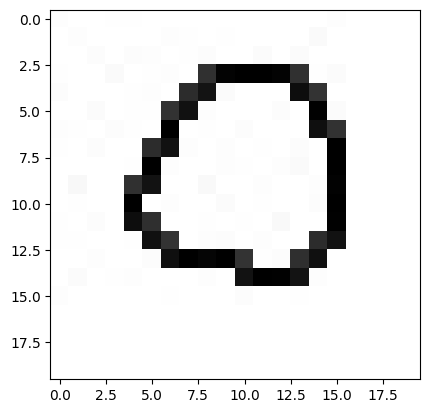

In [ ]:
# Номер тестового изображения
n_rec = np.random.randint(x_train.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_train[n_rec], cmap='gray')
plt.show()

Сохранение картинки в переменную

In [ ]:
# Выбор нужной картинки из тестовой выборки
x = x_train_r[n_rec]

# Проверка формы данных
print(x.shape)

(400,)


In [ ]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 400)


Распознавание

In [ ]:
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.9909883  0.00322543 0.00578622]]
Распознан класс: 0
Класс изображения: 0


Вариант 2. 10 нейронов, функция активации "relu", batch_size = 100

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(10, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=100, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │           4,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,043 (15.79 KB)

 Trainable params: 4,043 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2433 - loss: 1.2186 
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3248 - loss: 1.1089
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4215 - loss: 1.0858
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4864 - loss: 1.0789 
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4973 - loss: 1.0554
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5399 - loss: 1.0098
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4568 - loss: 0.9908
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4740 - loss: 0.9735
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5309 - loss: 0.9733
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5269 - loss: 0.9577
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5362 - loss: 0.9453
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5977 - loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.44347852 0.19719146 0.3593301 ]]
Распознан класс: 0
Класс изображения: 0


Вариант 3. 10 нейронов, функция активации "relu", batch_size = 1000

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(10, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │           4,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,043 (15.79 KB)

 Trainable params: 4,043 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step - accuracy: 0.3510 - loss: 1.7242
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3411 - loss: 1.5666
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3411 - loss: 1.4443
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3311 - loss: 1.3494
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3444 - loss: 1.2788
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3377 - loss: 1.2250
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3477 - loss: 1.1826
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3709 - loss: 1.1454
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3974 - loss: 1.1126
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4272 - loss: 1.0875
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4702 - loss: 1.0683
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5232 - loss: 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[0.42732567 0.31853878 0.25413552]]
Распознан класс: 0
Класс изображения: 0


Вариант 4. 10 нейронов, функция активации "linear", batch_size = 10

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(10, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │           4,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,043 (15.79 KB)

 Trainable params: 4,043 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4424 - loss: 1.1612
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.8053
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.7786
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7282 - loss: 0.6745
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7490 - loss: 0.7004
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.5910
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.5875
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.6438
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7543 - loss: 0.6540
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8327 - loss: 0.5327
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8584 - loss: 0.4890
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8038

Вариант 5. 10 нейронов, функция активации "linear", batch_size = 100

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(10, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=100, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 10)                  │           4,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,043 (15.79 KB)

 Trainable params: 4,043 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3341 - loss: 1.4031
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3656 - loss: 1.2824
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3803 - loss: 1.3079
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4445 - loss: 1.1745 
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5156 - loss: 1.0837 
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5269 - loss: 1.0208 
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5229 - loss: 0.9996
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5758 - loss: 0.9384
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5711 - loss: 0.9302
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5608 - loss: 0.9349
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5921 - loss: 0.8850
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6067 - loss: 

Вариант 6. 10 нейронов, функция активации "linear", batch_size = 1000

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(10, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 10)                  │           4,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,043 (15.79 KB)

 Trainable params: 4,043 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step - accuracy: 0.4139 - loss: 1.0887
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4967 - loss: 1.0205
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4768 - loss: 0.9956
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4735 - loss: 1.0009
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4868 - loss: 0.9774
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5066 - loss: 0.9380
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5695 - loss: 0.9095
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5762 - loss: 0.8979
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5828 - loss: 0.8903
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5861 - loss: 0.8775
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6126 - loss: 0.8608
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6291 - loss: 0.

Вариант 7. 100 нейронов, функция активации "relu", batch_size = 10

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(100, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,403 (157.82 KB)

 Trainable params: 40,403 (157.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4282 - loss: 1.2547
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.6612
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7506 - loss: 0.5932
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.6194
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.4128
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8510 - loss: 0.4282
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3970
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8725 - loss: 0.3872
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - loss: 0.3051
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9014 - loss: 0.2980
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9270 - loss: 0.2503
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9276

Вариант 8. 100 нейронов, функция активации "relu", batch_size = 100

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(100, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=100, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,403 (157.82 KB)

 Trainable params: 40,403 (157.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3763 - loss: 1.2879 
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4338 - loss: 1.3151
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5625 - loss: 0.8941
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5435 - loss: 0.9289
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5838 - loss: 0.8873
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6330 - loss: 0.8205 
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6470 - loss: 0.7863
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6316 - loss: 0.8006
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7278 - loss: 0.7027
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6938 - loss: 0.7307
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7484 - loss: 0.6465
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7088 - loss: 0

Вариант 9. 100 нейронов, функция активации "relu", batch_size = 1000

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(100, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,403 (157.82 KB)

 Trainable params: 40,403 (157.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3146 - loss: 1.2939
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3742 - loss: 1.2112
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.4470 - loss: 1.1270
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.4967 - loss: 1.0136
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5927 - loss: 0.9160
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6126 - loss: 0.8995
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5695 - loss: 0.8910
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6291 - loss: 0.8336
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.7053 - loss: 0.7829
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6887 - loss: 0.7662
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6523 - loss: 0.7612
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.6623 - loss

Вариант 10. 100 нейронов, функция активации "linear", batch_size = 10

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(100, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,403 (157.82 KB)

 Trainable params: 40,403 (157.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4126 - loss: 1.5400
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6522 - loss: 0.7662
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.7297
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.7264
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8423 - loss: 0.4936
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 0.5007
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7349 - loss: 0.6654
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7665 - loss: 0.5778
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8431 - loss: 0.4568
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8260 - loss: 0.4571
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8066 - loss: 0.4764
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734

Вариант 11. 100 нейронов, функция активации "linear", batch_size = 100

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(100, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=100, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,403 (157.82 KB)

 Trainable params: 40,403 (157.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3533 - loss: 1.3925 
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4590 - loss: 1.2286
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5372 - loss: 1.0490 
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5998 - loss: 0.9630
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5190 - loss: 1.0285
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6539 - loss: 0.8144
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6050 - loss: 1.0603 
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6796 - loss: 0.8549
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6635 - loss: 0.7738
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6968 - loss: 0.7245
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6140 - loss: 0.8210
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6688 - loss: 

Вариант 12. 100 нейронов, функция активации "linear", batch_size = 1000

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(100, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,403 (157.82 KB)

 Trainable params: 40,403 (157.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3278 - loss: 1.3885
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.3444 - loss: 1.7459
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.3609 - loss: 1.5368
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4636 - loss: 1.1572
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4272 - loss: 1.1402
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4139 - loss: 1.1639
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.4669 - loss: 1.1603
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4934 - loss: 1.0422
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6159 - loss: 0.8648
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6093 - loss: 0.8727
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5596 - loss: 0.9610
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5861 - loss: 

Вариант 13. 5000 нейронов, функция активации "relu", batch_size = 10

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(5000, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 5000)                │       2,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │          15,003 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,020,003 (7.71 MB)

 Trainable params: 2,020,003 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5067 - loss: 1.6280
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7393 - loss: 0.6082
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8322 - loss: 0.5247
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8486 - loss: 0.4233
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8517 - loss: 0.4688
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8279 - loss: 0.4887
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8664 - loss: 0.2875
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9257 - loss: 0.2567
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9187 - loss: 0.1938
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9750 - loss: 0.1314
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9698 - loss: 0.1324
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accu

Вариант 14. 5000 нейронов, функция активации "relu", batch_size = 100

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(5000, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=100, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 5000)                │       2,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 3)                   │          15,003 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,020,003 (7.71 MB)

 Trainable params: 2,020,003 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3846 - loss: 2.2057
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3617 - loss: 4.3420
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4265 - loss: 2.1904
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5032 - loss: 1.9248
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4967 - loss: 1.2150
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6029 - loss: 0.8659
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6968 - loss: 0.8255
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6928 - loss: 0.7998
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7749 - loss: 0.5728
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6400 - loss: 0.7530
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6744 - loss: 0.6983
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6326 - loss: 0.7

Вариант 15. 5000 нейронов, функция активации "relu", batch_size = 1000

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(5000, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 5000)                │       2,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 3)                   │          15,003 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,020,003 (7.71 MB)

 Trainable params: 2,020,003 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3344 - loss: 1.1591
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3311 - loss: 5.9031
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4636 - loss: 3.6434
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.4669 - loss: 1.3435
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3377 - loss: 2.8257
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3377 - loss: 2.3516
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5033 - loss: 1.1438
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5232 - loss: 0.8849
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5563 - loss: 1.1972
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5795 - loss: 1.3508
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5596 - loss: 1.2753
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5695 - 

Вариант 16. 5000 нейронов, функция активации "linear", batch_size = 10

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(5000, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 5000)                │       2,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 3)                   │          15,003 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,020,003 (7.71 MB)

 Trainable params: 2,020,003 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3827 - loss: 6.1254
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6132 - loss: 1.1395
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6545 - loss: 0.9058
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7571 - loss: 0.6235
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8092 - loss: 0.5564
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7460 - loss: 0.5494
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8819 - loss: 0.3374
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8154 - loss: 0.4540
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7661 - loss: 0.5267
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7652 - loss: 0.5981
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7809 - loss: 0.5587
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accu

Вариант 17. 5000 нейронов, функция активации "linear", batch_size = 100

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(5000, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=100, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 5000)                │       2,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 3)                   │          15,003 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,020,003 (7.71 MB)

 Trainable params: 2,020,003 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3683 - loss: 3.2992
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4082 - loss: 7.7278
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5330 - loss: 6.8248
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5861 - loss: 3.1433
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5063 - loss: 4.3102
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6548 - loss: 2.6564
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6008 - loss: 1.9404
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6864 - loss: 1.5360
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7297 - loss: 1.4225
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7367 - loss: 1.0651
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6646 - loss: 1.1471
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7175 - loss: 0.9

Вариант 18. 5000 нейронов, функция активации "linear", batch_size = 1000

In [ ]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(5000, input_dim=400, activation='linear'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 5000)                │       2,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 3)                   │          15,003 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,020,003 (7.71 MB)

 Trainable params: 2,020,003 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4073 - loss: 1.1155
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4040 - loss: 12.5978
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3311 - loss: 10.1078
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4437 - loss: 2.2954
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.3377 - loss: 7.2797
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3377 - loss: 8.3137
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4934 - loss: 5.4875
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.3444 - loss: 6.8656
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.3974 - loss: 6.6320
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4834 - loss: 4.0623
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7318 - loss: 1.3224
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5563 